In [3315]:
import pandas as pd 
import numpy as np


In [3316]:
df = pd.read_csv('lex.csv')

df

,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,afg,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,75.92,76.07,76.21,76.36,76.50,76.65,76.80,76.95,77.10,77.25
1,ago,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,75.75,75.87,75.99,76.12,76.26,76.39,76.52,76.65,76.79,76.91
2,alb,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,88.93,89.05,89.17,89.28,89.40,89.51,89.62,89.73,89.84,89.95
3,and,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.02,91.14,91.25,91.36,91.47,91.59,91.71,91.82,91.93,92.04
4,are,UAE,30.70,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,83.67,83.78,83.90,84.02,84.14,84.24,84.35,84.47,84.58,84.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,wsm,Samoa,25.40,25.40,25.40,25.40,25.40,25.40,25.40,25.40,...,81.11,81.25,81.38,81.51,81.64,81.77,81.90,82.02,82.15,82.27
190,yem,Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,80.59,80.76,80.92,81.08,81.25,81.40,81.58,81.75,81.92,82.08
191,zaf,South Africa,33.50,33.50,33.50,33.50,33.50,33.50,33.50,33.50,...,74.02,74.15,74.29,74.42,74.55,74.69,74.82,74.96,75.09,75.24
192,zmb,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,73.29,73.42,73.55,73.69,73.81,73.95,74.08,74.22,74.35,74.48


# To avoid duplicates we need to check all column names

In [3317]:
for col in df.columns:
    if col in df[col].values:
        print(col)
        #col.rename("geo_data")

        df.rename(columns={col: "geo_data"}, inplace=True)

geo


In [3318]:
country_name = df["name"]

In [3319]:
df = df.T

In [3320]:
df.columns = df.iloc[0]

In [3321]:
df = df.reset_index(drop=False)

In [3322]:
df = df.drop(0, axis=0)
df = df.drop(1, axis=0)
df.reset_index(drop=True, inplace=True)

- We renamed geo to geo_data

In [3323]:
df.rename(columns={"index": "geo_data"}, inplace=True)

### We just want the entrys with values no null values

### We are looking on just getting the column name

In [3324]:
place_holder = []


for col in df.columns:

    saved_values = []


    for idx, value in enumerate(df[col]):
        if pd.isna(value):#not no_value[idx]:  # nur vorhandene Werte
            place_holder.append(col)
            break

place_holder


['and', 'dma', 'kna', 'lie', 'mco', 'mhl', 'nru', 'plw', 'smr', 'tuv']

### We are getting the exact posionen and afterwards the entry

In [ ]:
saved_date = {}


for col in df.columns:

    saved_values = []


    for idx, value in enumerate(df[col]):
        if pd.isna(value):
            saved_values.append(idx)
    
    saved_date[col] = saved_values  


In [3326]:
missing_entrys = []

for key, value in saved_date.items():
    missing_entrys.append(len(value))
    #print(len(value))

#missing_entrys

In [3327]:
need_tag = []

for key, val in saved_date.items():
    if val:
    #if any(pd.isna(saved_date[key])):#== True:#saved_date[key]  
        #print(key)
        need_tag.append(key)

In [3328]:
option = []

for col in df.columns:
    if col in need_tag:
        option.append(True)
    else:
        option.append(False)

#option        

In [3329]:
option = np.delete(option, 1)
missing_entrys = np.delete(missing_entrys, 1)

In [3330]:
country_shot = "deu"

if country_shot in need_tag:
    raise ValueError("The country you want to analyse is not complet")


## This is an example of how it could look like in the end

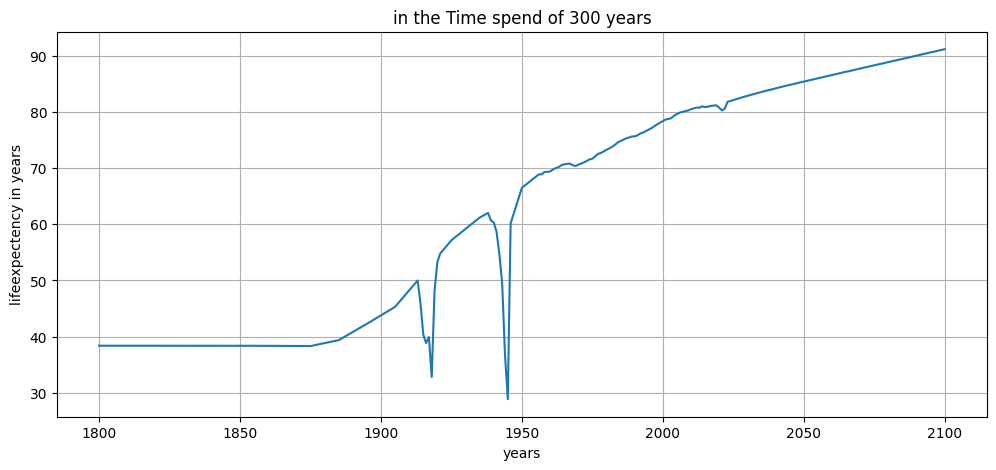

In [3331]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(range(1800, 1800 + len(df[country_shot])),pd.to_numeric(df[country_shot].replace(country_shot, None), errors="coerce"))
plt.title("in the Time spend of 300 years")
plt.xlabel("years")
plt.ylabel("lifeexpectency in years")
plt.grid(True)
plt.show()

In [3332]:
df = df.T

In [3333]:
df.columns = df.iloc[0]
df = df[1:]

df.reset_index(drop=False, inplace=True)

In [3334]:
df["incompleted"] = option
df["missing_entrys_number"] = missing_entrys

In [3335]:
for col in df.columns[1:302]:
    #print(col)


    for i in df.index[df[col].isna()]:
        df.loc[i, col] = round(df[col].mean(),2)  # nur die Spalte "1802" ändern
        #print(f"NaN in Zeile {i}")

In [3336]:
df.insert(1, "name", country_name)


In [3337]:
df

geo_data,geo_data,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2093,2094,2095,2096,2097,2098,2099,2100,incompleted,missing_entrys_number
0,afg,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,...,76.21,76.36,76.5,76.65,76.8,76.95,77.1,77.25,False,0
1,ago,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,75.99,76.12,76.26,76.39,76.52,76.65,76.79,76.91,False,0
2,alb,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,89.17,89.28,89.4,89.51,89.62,89.73,89.84,89.95,False,0
3,and,Andorra,31.5,31.46,31.48,31.38,31.46,31.59,31.65,31.6,...,91.25,91.36,91.47,91.59,91.71,91.82,91.93,92.04,True,150
4,are,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,83.9,84.02,84.14,84.24,84.35,84.47,84.58,84.69,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,wsm,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,81.38,81.51,81.64,81.77,81.9,82.02,82.15,82.27,False,0
190,yem,Yemen,23.39,23.39,23.39,23.39,23.39,23.39,23.39,23.39,...,80.92,81.08,81.25,81.4,81.58,81.75,81.92,82.08,False,0
191,zaf,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,74.29,74.42,74.55,74.69,74.82,74.96,75.09,75.24,False,0
192,zmb,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,73.55,73.69,73.81,73.95,74.08,74.22,74.35,74.48,False,0


# We have now a data set which replaced nan with the average values of that specific year and we can see which row was incomplete and how many entrys were nan

In [3338]:
#df.to_csv('cleaned_data.csv')
df.to_csv("cleaned_data.csv", index=False)
